# Diabetes Prediction
---

## Introduction
---
In this project I aim to build a machine learning application using Flask, Machine Learning, and Heroku to accurately predict whether or not the patients in the dataset have diabetes or not?

## Import the necessary libraries
---

In [1]:
#importing Libraries
import numpy as np   
np.random.seed(42)   ## so that output would be same
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline   ## our plot lies on the same notebook
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
#for warning
from warnings import filterwarnings
filterwarnings("ignore")  ## To remove any kind of warning

UsageError: unrecognized arguments: ## our plot lies on the same notebook


## Load the dataset
---

In [3]:
df = pd.read_csv("Documents/Projects/Diabetes Prediction/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Each row in the dataset represents an individual patient, and there are several columns that provide information about these patients. Here's an interpretation of each column in the dataset:

- Pregnancies: This column represents the number of pregnancies the individual has had.

- Glucose: This column represents the glucose (blood sugar) level of the individual, which is an important factor in diabetes diagnosis.

- BloodPressure: This column represents the blood pressure of the individual.

- SkinThickness: This column represents the thickness of the skinfold at the triceps area.

- Insulin: The insulin level of the individual. Insulin is a hormone that regulates blood sugar levels.

- BMI (Body Mass Index): The Body Mass Index of the individual, which is a measure of body fat based on height and weight.

- DiabetesPedigreeFunction: A function that provides information about the genetic predisposition of diabetes in the individual's family.

- Age: The age of the individual.

- Outcome: Outcome is the target variable. It  represents whether the individual has diabetes or not, with 1 indicating the presence of diabetes and 0 indicating the absence.

## Exploreatory Data Analysis (EDA)
---

### Numerical summary of the variables

In [9]:
# Using .describe() to provide statistics such as count, mean, standard deviation, minimum, 25th percentile,
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Displaying information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# Return the shape of dataset 
print(df.shape)  

(767, 9)


In [13]:
# Checking for missing values (NaN) in the dataset.
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

According to the result there is no missing values or NaN in the dataset.

### Graphical summary of the variables

([<matplotlib.axis.XTick at 0x7fef9334aaa0>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

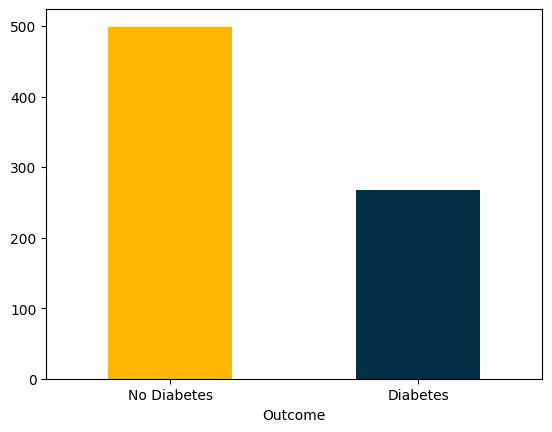

In [21]:
df["Outcome"].value_counts().plot(kind="bar", color=["#FFB703", "#023047"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'), rotation=0)
